In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from scipy.spatial import distance
import math

In [2]:
# Load the data from the txt file, skip the first column (usecols specifies which columns to load)
data = np.loadtxt('df_wells_UTM.txt', delimiter=',', usecols=(1, 2, 3))

# Split the columns into variables (X, Y, and Elevation)
x_coord, y_coord, z_wells = data.T  # Transpose for easy unpacking

# Print the loaded data
print("X coordinates:", x_coord), print("Y coordinates:", y_coord), print("Elevations:", z_wells);

X coordinates: [642148.73308783 642146.54931114 642144.36553418]
Y coordinates: [1105249.52624115 1105247.30581951 1105245.08539804]
Elevations: [3.6   3.301 2.981]


In [3]:
#functions
def euclidean_distance(x1, y1, x2, y2):
    """Calculate Euclidean distance between two points (x1, y1) and (x2, y2)"""
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def angle_between_vectors(v1, v2):  
    v1 = np.array(v1)  
    v2 = np.array(v2)  
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))  
    angle = np.arccos(cos_theta)  # angle in radians  
    return np.degrees(angle)  # convert to degrees 

In [4]:
#translate direction to UTM system
angle_deg = 228
angle_rad = np.radians(angle_deg)

#create UTM vector 228
V_228 = (np.sin(angle_rad), np.cos(angle_rad))
V_opp = (-np.cos(angle_rad), np.sin(angle_rad))

In [5]:
#vector between well 1 and 2
V_12 = (x_coord[1] - x_coord[0], y_coord[1] - y_coord[0])

#anglewell12
angle_deg_1 = angle_between_vectors(V_228, V_12)
angle_deg_2 = angle_between_vectors(V_opp, V_12)
angle_rad_1, angle_rad_2 = np.radians(angle_deg_1), np.radians(angle_deg_2) #both angles in radians

dist_well12 = euclidean_distance(x_coord[0], y_coord[0], x_coord[1], y_coord[1])

#leg distance using sinus regel
b1 = (dist_well12 * np.sin(angle_rad_2)) / np.sin(np.radians(90))

In [6]:
#vector between well 1 and 2
V_32 = (x_coord[1] - x_coord[2], y_coord[1] - y_coord[2])

#anglewell12
angle_deg_3 = angle_between_vectors(V_228, V_32)
angle_deg_22 = angle_between_vectors(V_opp, V_32)
angle_rad_3, angle_rad_2 = np.radians(angle_deg_3), np.radians(angle_deg_22) #both angles in radians

dist_well32 = euclidean_distance(x_coord[2], y_coord[2], x_coord[1], y_coord[1])

#leg distance using sinus regel
b3 = (dist_well32 * np.sin(angle_rad_2)) / np.sin(np.radians(90))

In [7]:
print(b1, b3)

3.1086144250962455 3.1086145132720406



[0, 3.1086144250962455, 6.217228938368287, 6.461614425096245, 9.311614425096245, 12.157614425096245, 14.979614425096246, 17.865614425096247, 20.690614425096246, 23.617614425096246, 26.530614425096246, 29.336614425096247]

[ 0.    -0.261 -0.585 -0.662 -0.899 -1.117 -1.317 -1.577 -1.787 -2.027
 -2.237 -2.437]


(-1.4668307212548124,
 30.80344514635106,
 -2.5588500000000005,
 0.12185000000000001)

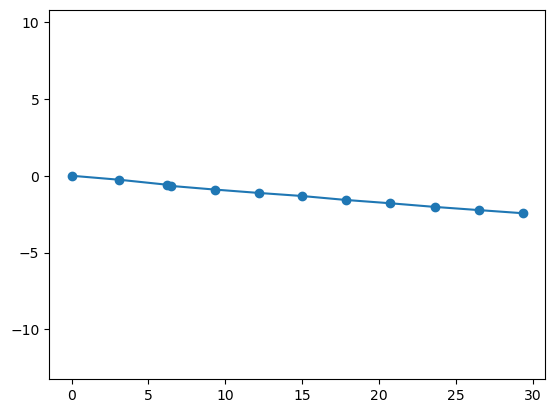

In [20]:
#This code is for altering the local transect and interpolate, so that it can be used as the iz input for matlab CoastalCam

#########known#########
laserheight = 0.02
#well base
distance_wells = [0, b1, b1+b3] #distance from well 1 (either 228, or 226 degree North)

#########input 04_10_24#########
#daily height fluctuations
fluc_wells = [value / 100 for value in [23.2, 19.4, 19.8]] #height well above sand level

transect_dist = [3.353, 6.203, 9.049, 11.871, 14.757, 17.582, 20.509, 23.422, 26.228] #distance from well 2
transect_z = [-0.575, -0.812, -1.03, -1.23, -1.49, -1.7, -1.94, -2.15, -2.35]

#########automatic part#########
#combine into one dist/z list
step1 = (transect_dist + distance_wells[1]) #distance from well 1
# Create new lists to store the combined data
dist = distance_wells.copy()  # Copy the original distance_wells list
dist.extend(step1)  # Add the calculated distances to the new dist list

# step2 = [z_well - fluc_well for z_well, fluc_well in zip(z_wells, fluc_wells)] #height correction for wells (list comprehension)
step3 = transect_z - (fluc_wells[1] + laserheight) * np.ones(9)  # height correction for transect

step4 = z_wells - fluc_wells
step5 = step4 - step4[0]
step6 = (0 + step5[1] + fluc_wells[1] - laserheight) + transect_z

# Combine the height corrections into a single list
z = np.hstack((step5, step6))

# print(step2)
print()
print(dist)
print()
print(z)
# plot
plt.plot(dist, z, marker='o')
plt.ylim(-4, 0)
plt.xlim(0, 30)
plt.axis('equal')